In [60]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from numpy import concatenate
from matplotlib import pyplot as plt

In [108]:
data = pd.read_csv('/home/kishora/Documents/testResult/bestLstm_lag_4_d2')
data.drop(columns=['rcdate'],inplace=True)
data['err']=data['tar']-data['out']
print(data.head())
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data.values)

          tar        out         err
0  125.782610  276.46924 -150.686630
1  123.608690  276.38467 -152.775980
2  121.434784  276.30963 -154.874846
3  119.260870  276.24400 -156.983130
4  117.086960  276.18784 -159.100880


In [109]:
data = pd.DataFrame(scaled)
data.head()

,0,1,2
0,0.001615,0.005818,0.215250
1,0.001587,0.005817,0.215183
2,0.001559,0.005815,0.215117
3,0.001531,0.005814,0.215050
4,0.001503,0.005813,0.214983


In [154]:
xx= np.array(list(data.iloc[500:,1]))
xx=xx.reshape(1683,1)

In [155]:
tar=np.array(list(data.iloc[500:,2])).reshape(1683,1)

In [131]:
tar

array([[0.21524958],
       [0.21518328],
       [0.21511668],
       [0.21504978],
       [0.21498258],
       [0.21491508],
       [0.21484728],
       [0.21477918],
       [0.21471078],
       [0.21464208],
       [0.21457308],
       [0.21450378],
       [0.21443418],
       [0.21436427],
       [0.21429407],
       [0.21422356],
       [0.21415275],
       [0.21403784],
       [0.21383629],
       [0.21363795],
       [0.21389478],
       [0.2135423 ],
       [0.21355543],
       [0.21353494],
       [0.21352062],
       [0.21369067],
       [0.21338156],
       [0.21335061],
       [0.21331435],
       [0.21319303],
       [0.21307093],
       [0.21305858],
       [0.21303445],
       [0.21289996],
       [0.21306414],
       [0.21320295],
       [0.21297965],
       [0.21279484],
       [0.21247569],
       [0.2125156 ],
       [0.21242285],
       [0.21270935],
       [0.21292047],
       [0.21295883],
       [0.21298118],
       [0.21225248],
       [0.21215929],
       [0.212

In [113]:
def der(x):
    return (x*(1-x))
def sigmoid (x):
    return (1/(1 + np.exp(-x)))

In [150]:
#Artificial neural network
n=[1,3,1]
w=[]
b=[]
r=0.096
err=[]
epoch=10000
for i in range(len(n)-1):
    w.append(np.random.uniform(size=(n[i],n[i+1])))
    b.append(np.random.uniform(size=(1,n[i+1])))
    
inp = []
inp.append(xx)

for k in range(len(n)-1):
    inp.append(sigmoid(inp[k].dot(w[k])+b[k]))
x=(tar-inp[len(n)-1])
err.append(der(inp[len(n)-1])*x)
for i in range(len(n)-2):
    y=err[i].dot(w[len(n)-2-i].T)
    err.append(der(inp[len(n)-2-i])*y)
for k in range(len(n)-1):
    w[len(n)-2-i]+= inp[len(n)-2-i].T.dot(err[i])*r

for z in range(7000):
    for k in range(len(n)-1):
        inp[k+1]=(sigmoid(inp[k].dot(w[k])+b[k]))
    x=(tar-inp[len(n)-1])
    err[0] = (der(inp[len(n)-1])*x)
    for i in range(len(n)-2):
        y=err[i].dot(w[len(n)-2-i].T)
        err[i+1]=(der(inp[len(n)-2-i])*y)
    for i in range(len(n)-1):
        w[len(n)-2-i]+= inp[len(n)-2-i].T.dot(err[i])*r
k=0
from math import sqrt
from sklearn.metrics import mean_squared_error
print(sqrt(mean_squared_error(tar, inp[len(n)-1])))

0.021644892874558702


In [156]:
#for test case runing
n=[1,3,1]
w=[]
b=[]
r=0.096
err=[]
epoch=10000
for i in range(len(n)-1):
    w.append(np.random.uniform(size=(n[i],n[i+1])))
    b.append(np.random.uniform(size=(1,n[i+1])))
    
inp = []
inp.append(xx)

for k in range(len(n)-1):
    inp.append(sigmoid(inp[k].dot(w[k])+b[k]))

In [157]:
# tar = .reshape((len(tar), 1))
inv_yx = concatenate((scaled[500:, :2],inp[len(n)-1]), axis=1)
inv_yy = scaler.inverse_transform(inv_yx)
out = inv_yy[:,2]
inv_yz = concatenate((scaled[500:, :2],tar), axis=1)
inv_yz = scaler.inverse_transform(inv_yz)
target = inv_yz[:,2]

In [158]:
print(sqrt(mean_squared_error(target, out)))

17636.690946406918


In [116]:
inp[len(n)-1].shape

(2183, 1)

In [117]:
inv_yx.shape

(2183, 3)

In [118]:
tar.shape

(2183, 1)

In [119]:
concatenate((scaled[:, :2],tar), axis=1)

array([[0.00161467, 0.00581837, 0.21524958],
       [0.00158676, 0.00581678, 0.21518328],
       [0.00155885, 0.00581537, 0.21511668],
       ...,
       [0.00125802, 0.00437578, 0.21681026],
       [0.00132221, 0.00438566, 0.21695218],
       [0.00125802, 0.00436902, 0.2168217 ]])

In [55]:
target

array([-6934.217, -6934.217, -6934.217, ..., -6934.217, -6934.217,
       -6934.217])

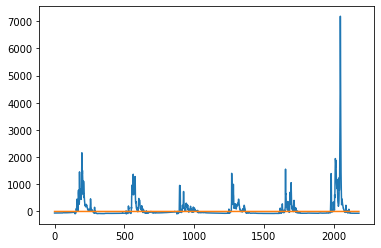

In [122]:
plt.plot(out)
plt.plot(tar)

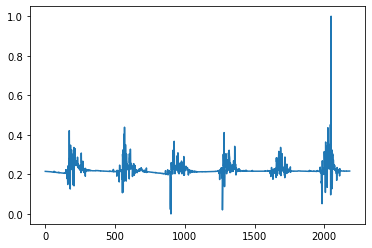